In [52]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
api_key='ZI4JR4GFIP9V36DU'

In [3]:
symbol = 'MSFT'

In [4]:
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full'

In [5]:
response = requests.get(url)

In [6]:
data = response.json()

In [7]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2025-07-23',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-07-23': {'1. open': '506.7500',
   '2. high': '506.7900',
   '3. low': '500.7000',
   '4. close': '505.8700',
   '5. volume': '16396585'},
  '2025-07-22': {'1. open': '510.9700',
   '2. high': '511.2000',
   '3. low': '505.2700',
   '4. close': '505.2700',
   '5. volume': '13868644'},
  '2025-07-21': {'1. open': '506.7050',
   '2. high': '512.0900',
   '3. low': '505.5500',
   '4. close': '510.0600',
   '5. volume': '14066805'},
  '2025-07-18': {'1. open': '514.4800',
   '2. high': '514.6400',
   '3. low': '507.4300',
   '4. close': '510.0500',
   '5. volume': '21209666'},
  '2025-07-17': {'1. open': '505.6800',
   '2. high': '513.3700',
   '3. low': '505.6200',
   '4. close': '511.7000',
   '5. volume': '17503129'},
  '2025-07-16': {'1. open': '5

In [8]:
time_series = data['Time Series (Daily)']

In [9]:
df = pd.DataFrame.from_dict(time_series, orient='index')
df = df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
})

In [10]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [11]:
df = df.astype(float)

In [12]:
df.head()

,Open,High,Low,Close,Volume
1999-11-01,93.25,94.19,92.12,92.37,26630600.0
1999-11-02,92.75,94.50,91.94,92.56,23174500.0
1999-11-03,92.94,93.50,91.50,92.00,22258500.0
1999-11-04,92.31,92.75,90.31,91.75,27119700.0
1999-11-05,91.81,92.87,90.50,91.56,35083700.0


In [13]:
df.shape

(6470, 5)

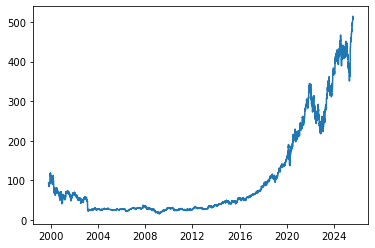

In [14]:
plt.plot(df['Open'])

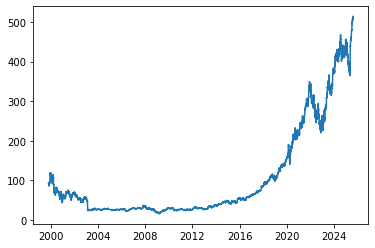

In [15]:
plt.plot(df['High'])

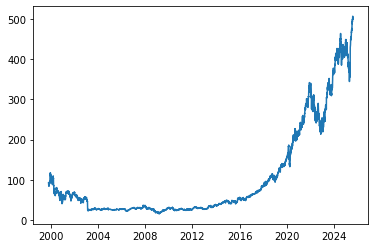

In [16]:
plt.plot(df['Low'])

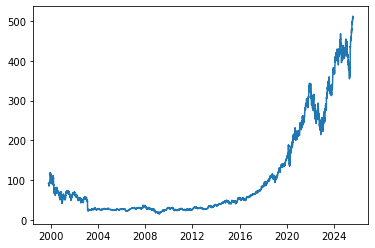

In [17]:
plt.plot(df['Close'])

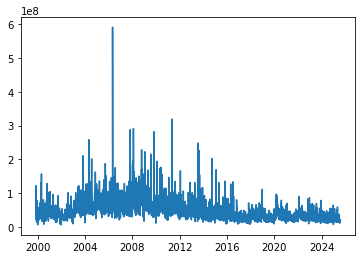

In [18]:
plt.plot(df['Volume'])

In [19]:
df['daily_return']=df['Close'].pct_change()

In [20]:
df.head()

,Open,High,Low,Close,Volume,daily_return
1999-11-01,93.25,94.19,92.12,92.37,26630600.0,NaN
1999-11-02,92.75,94.50,91.94,92.56,23174500.0,0.002057
1999-11-03,92.94,93.50,91.50,92.00,22258500.0,-0.006050
1999-11-04,92.31,92.75,90.31,91.75,27119700.0,-0.002717
1999-11-05,91.81,92.87,90.50,91.56,35083700.0,-0.002071


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6470 entries, 1999-11-01 to 2025-07-23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6470 non-null   float64
 1   High          6470 non-null   float64
 2   Low           6470 non-null   float64
 3   Close         6470 non-null   float64
 4   Volume        6470 non-null   float64
 5   daily_return  6469 non-null   float64
dtypes: float64(6)
memory usage: 353.8 KB


In [22]:
df.describe()

,Open,High,Low,Close,Volume,daily_return
count,6470.000000,6470.000000,6470.000000,6470.000000,6.470000e+03,6469.000000
mean,103.763546,104.832073,102.687199,103.800208,4.450828e+07,0.000472
std,117.286703,118.338629,116.205463,117.347660,2.725266e+07,0.019994
min,15.200000,15.620000,14.870000,15.150000,5.850800e+06,-0.483230
25%,27.842500,28.100250,27.600000,27.870000,2.568459e+07,-0.008151
50%,48.170000,48.900000,47.605000,48.297500,3.790182e+07,0.000353
75%,114.097500,115.045000,112.392500,114.342500,5.609415e+07,0.009395
max,514.480000,514.640000,507.430000,511.700000,5.910522e+08,0.195749


In [23]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
daily_return    1
dtype: int64

In [24]:
df.fillna(0,inplace=True)

In [25]:
df['MA20'] = df['Close'].rolling(window=20).mean()

In [26]:
df['MA50'] = df['Close'].rolling(window=50).mean()

In [27]:
df.head()

,Open,High,Low,Close,Volume,daily_return,MA20,MA50
1999-11-01,93.25,94.19,92.12,92.37,26630600.0,0.000000,NaN,NaN
1999-11-02,92.75,94.50,91.94,92.56,23174500.0,0.002057,NaN,NaN
1999-11-03,92.94,93.50,91.50,92.00,22258500.0,-0.006050,NaN,NaN
1999-11-04,92.31,92.75,90.31,91.75,27119700.0,-0.002717,NaN,NaN
1999-11-05,91.81,92.87,90.50,91.56,35083700.0,-0.002071,NaN,NaN


In [28]:
cor=df.corr()

In [29]:
cor

,Open,High,Low,Close,Volume,daily_return,MA20,MA50
Open,1.000000,0.999927,0.999928,0.999843,-0.418490,0.012523,0.998865,0.997084
High,0.999927,1.000000,0.999902,0.999926,-0.417306,0.016786,0.998914,0.997234
Low,0.999928,0.999902,1.000000,0.999928,-0.419819,0.016985,0.998712,0.996835
Close,0.999843,0.999926,0.999928,1.000000,-0.418690,0.021695,0.998741,0.996962
Volume,-0.418490,-0.417306,-0.419819,-0.418690,1.000000,-0.035380,-0.416521,-0.414750
daily_return,0.012523,0.016786,0.016985,0.021695,-0.035380,1.000000,0.008587,0.009310
MA20,0.998865,0.998914,0.998712,0.998741,-0.416521,0.008587,1.000000,0.998873
MA50,0.997084,0.997234,0.996835,0.996962,-0.414750,0.009310,0.998873,1.000000


In [30]:
df.shape

(6470, 8)

In [31]:
df.dropna(inplace=True)

In [32]:
df.head()

,Open,High,Low,Close,Volume,daily_return,MA20,MA50
2000-01-11,111.50,114.25,108.69,109.37,23371800.0,-0.025657,113.7335,100.0186
2000-01-12,108.50,108.87,104.44,105.81,33266200.0,-0.032550,114.0895,100.2874
2000-01-13,104.37,108.62,101.50,107.81,41572000.0,0.018902,114.0580,100.5924
2000-01-14,107.19,113.94,105.75,112.25,36708200.0,0.041184,113.9860,100.9974
2000-01-18,111.81,116.50,111.75,115.31,40741800.0,0.027261,113.9890,101.4686


In [33]:
df.shape

(6421, 8)

In [34]:
x=df.drop('Close',axis=1)

In [35]:
x.head()

,Open,High,Low,Volume,daily_return,MA20,MA50
2000-01-11,111.50,114.25,108.69,23371800.0,-0.025657,113.7335,100.0186
2000-01-12,108.50,108.87,104.44,33266200.0,-0.032550,114.0895,100.2874
2000-01-13,104.37,108.62,101.50,41572000.0,0.018902,114.0580,100.5924
2000-01-14,107.19,113.94,105.75,36708200.0,0.041184,113.9860,100.9974
2000-01-18,111.81,116.50,111.75,40741800.0,0.027261,113.9890,101.4686


In [36]:
y=df.Close

In [37]:
y.head()

2000-01-11    109.37
2000-01-12    105.81
2000-01-13    107.81
2000-01-14    112.25
2000-01-18    115.31
Name: Close, dtype: float64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [39]:
len(x_train)

4815

In [40]:
len(x_test)

1606

In [41]:
model=LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred=model.predict(x_test)

In [44]:
y_pred

array([ 69.39264654,  25.09744967, 374.4863778 , ...,  25.73379107,
       106.61994878, 245.01524289])

In [45]:
model.score(x_test,y_test)

0.9999563667340606

In [46]:
mae=mean_absolute_error(y_test,y_pred)

In [47]:
mae

0.4327126404771624

In [48]:
mse=mean_squared_error(y_test,y_pred)

In [49]:
mse

0.6302280585114992

In [50]:
r2=r2_score(y_test,y_pred)

In [51]:
r2

0.9999563667340606